<a href="https://colab.research.google.com/github/Uttam580/New_learning-/blob/master/Text_classifaication_autogluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Here we assume CUDA 10.0 is installed.  You should change the number
# according to your own CUDA version (e.g. mxnet-cu101 for CUDA 10.1).
! pip install mxnet-cu101
! pip install autogluon 

In [0]:
import autogluon as ag
from autogluon import TextClassification as task

/usr/local/lib/python3.6/dist-packages/mxnet/optimizer/optimizer.py:167: UserWarning: WARNING: New optimizer gluonnlp.optimizer.lamb.LAMB is overriding existing optimizer mxnet.optimizer.optimizer.LAMB
  Optimizer.opt_registry[name].__name__))


We are using a subset of the Stanford Sentiment Treebank (SST). The original dataset consists of sentences from movie reviews and human annotations of their sentiment. The task is to classify whether a given sentence has positive or negative sentiment (binary classification)

In [0]:
dataset = task.Dataset(name='ToySST')

AutoGluon fine-tunes neural networks that have already been pretrained on large scale text dataset such as Wikicorpus. Although the dataset involves entirely different text, lower-level features captured in the representations of the pretrained network (such as edge/texture detectors) are likely to remain useful for our own text dataset.

`TextClassification` is in preview mode.Please feel free to request new features in issues if it is not covered in the current implementation. If your dataset is in tabular format, you could also try out our `TabularPrediction` module.
Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


scheduler: FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.28.0.2/265/1' processes=1 threads=2, memory=13.65 GB>, Resource: NodeResourceManager(2 CPUs, 0 GPUs))
})



Using gradient accumulation. Effective batch size = batch_size * accumulate = 32


Vocab file is not found. Downloading.


Model file not found. Downloading to /root/.mxnet/models/bert_12_768_12_book_corpus_wiki_en_uncased-75cc780f.params.


validation metrics:accuracy:0.6250


Using gradient accumulation. Effective batch size = batch_size * accumulate = 32


validation metrics:accuracy:0.7500
Using gradient accumulation. Effective batch size = batch_size * accumulate = 32


validation metrics:accuracy:0.7500
Saving Training Curve in checkpoint/plot_training_curves.png


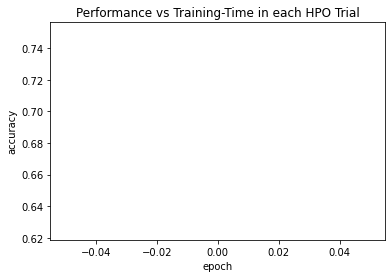

In [4]:
predictor = task.fit(dataset, epochs=1)

In [5]:
print('Top-1 val acc: %.3f' % predictor.results['best_reward'])

Top-1 val acc: 0.750


In [6]:
test_acc = predictor.evaluate(dataset)
print('Top-1 test acc: %.3f' % test_acc)

Top-1 test acc: 0.750


In [7]:
sentence = 'I feel this is awesome!'
ind = predictor.predict(sentence)
print('The input sentence sentiment is classified as [%d].' % ind.asscalar())

The input sentence sentiment is classified as [1].
